In [86]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style = 'darkgrid')
import matplotlib.pyplot as plt
from IPython.display import HTML, display
from IPython.core import display as ICD
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

#init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [87]:
# Read the column description and ensure you understand each attribute well
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                   5000 non-null int64
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [89]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [90]:
# Check whether any column has null values
data.apply(lambda x : sum(x.isnull()))

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [91]:
# View and understand the data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [92]:
# Finding the unique data
data.apply(lambda x: len(x.unique()))

ID                   5000
Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
PersonalLoan            2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

In [93]:
# Number of people with Zero Mortgage
data[data['Mortgage'] < 1]['Mortgage'].count()

3462

In [94]:
# Number of people with Zero Credit Card Spending per month
data[data['CreditCard'] < 1]['CreditCard'].count()

3530

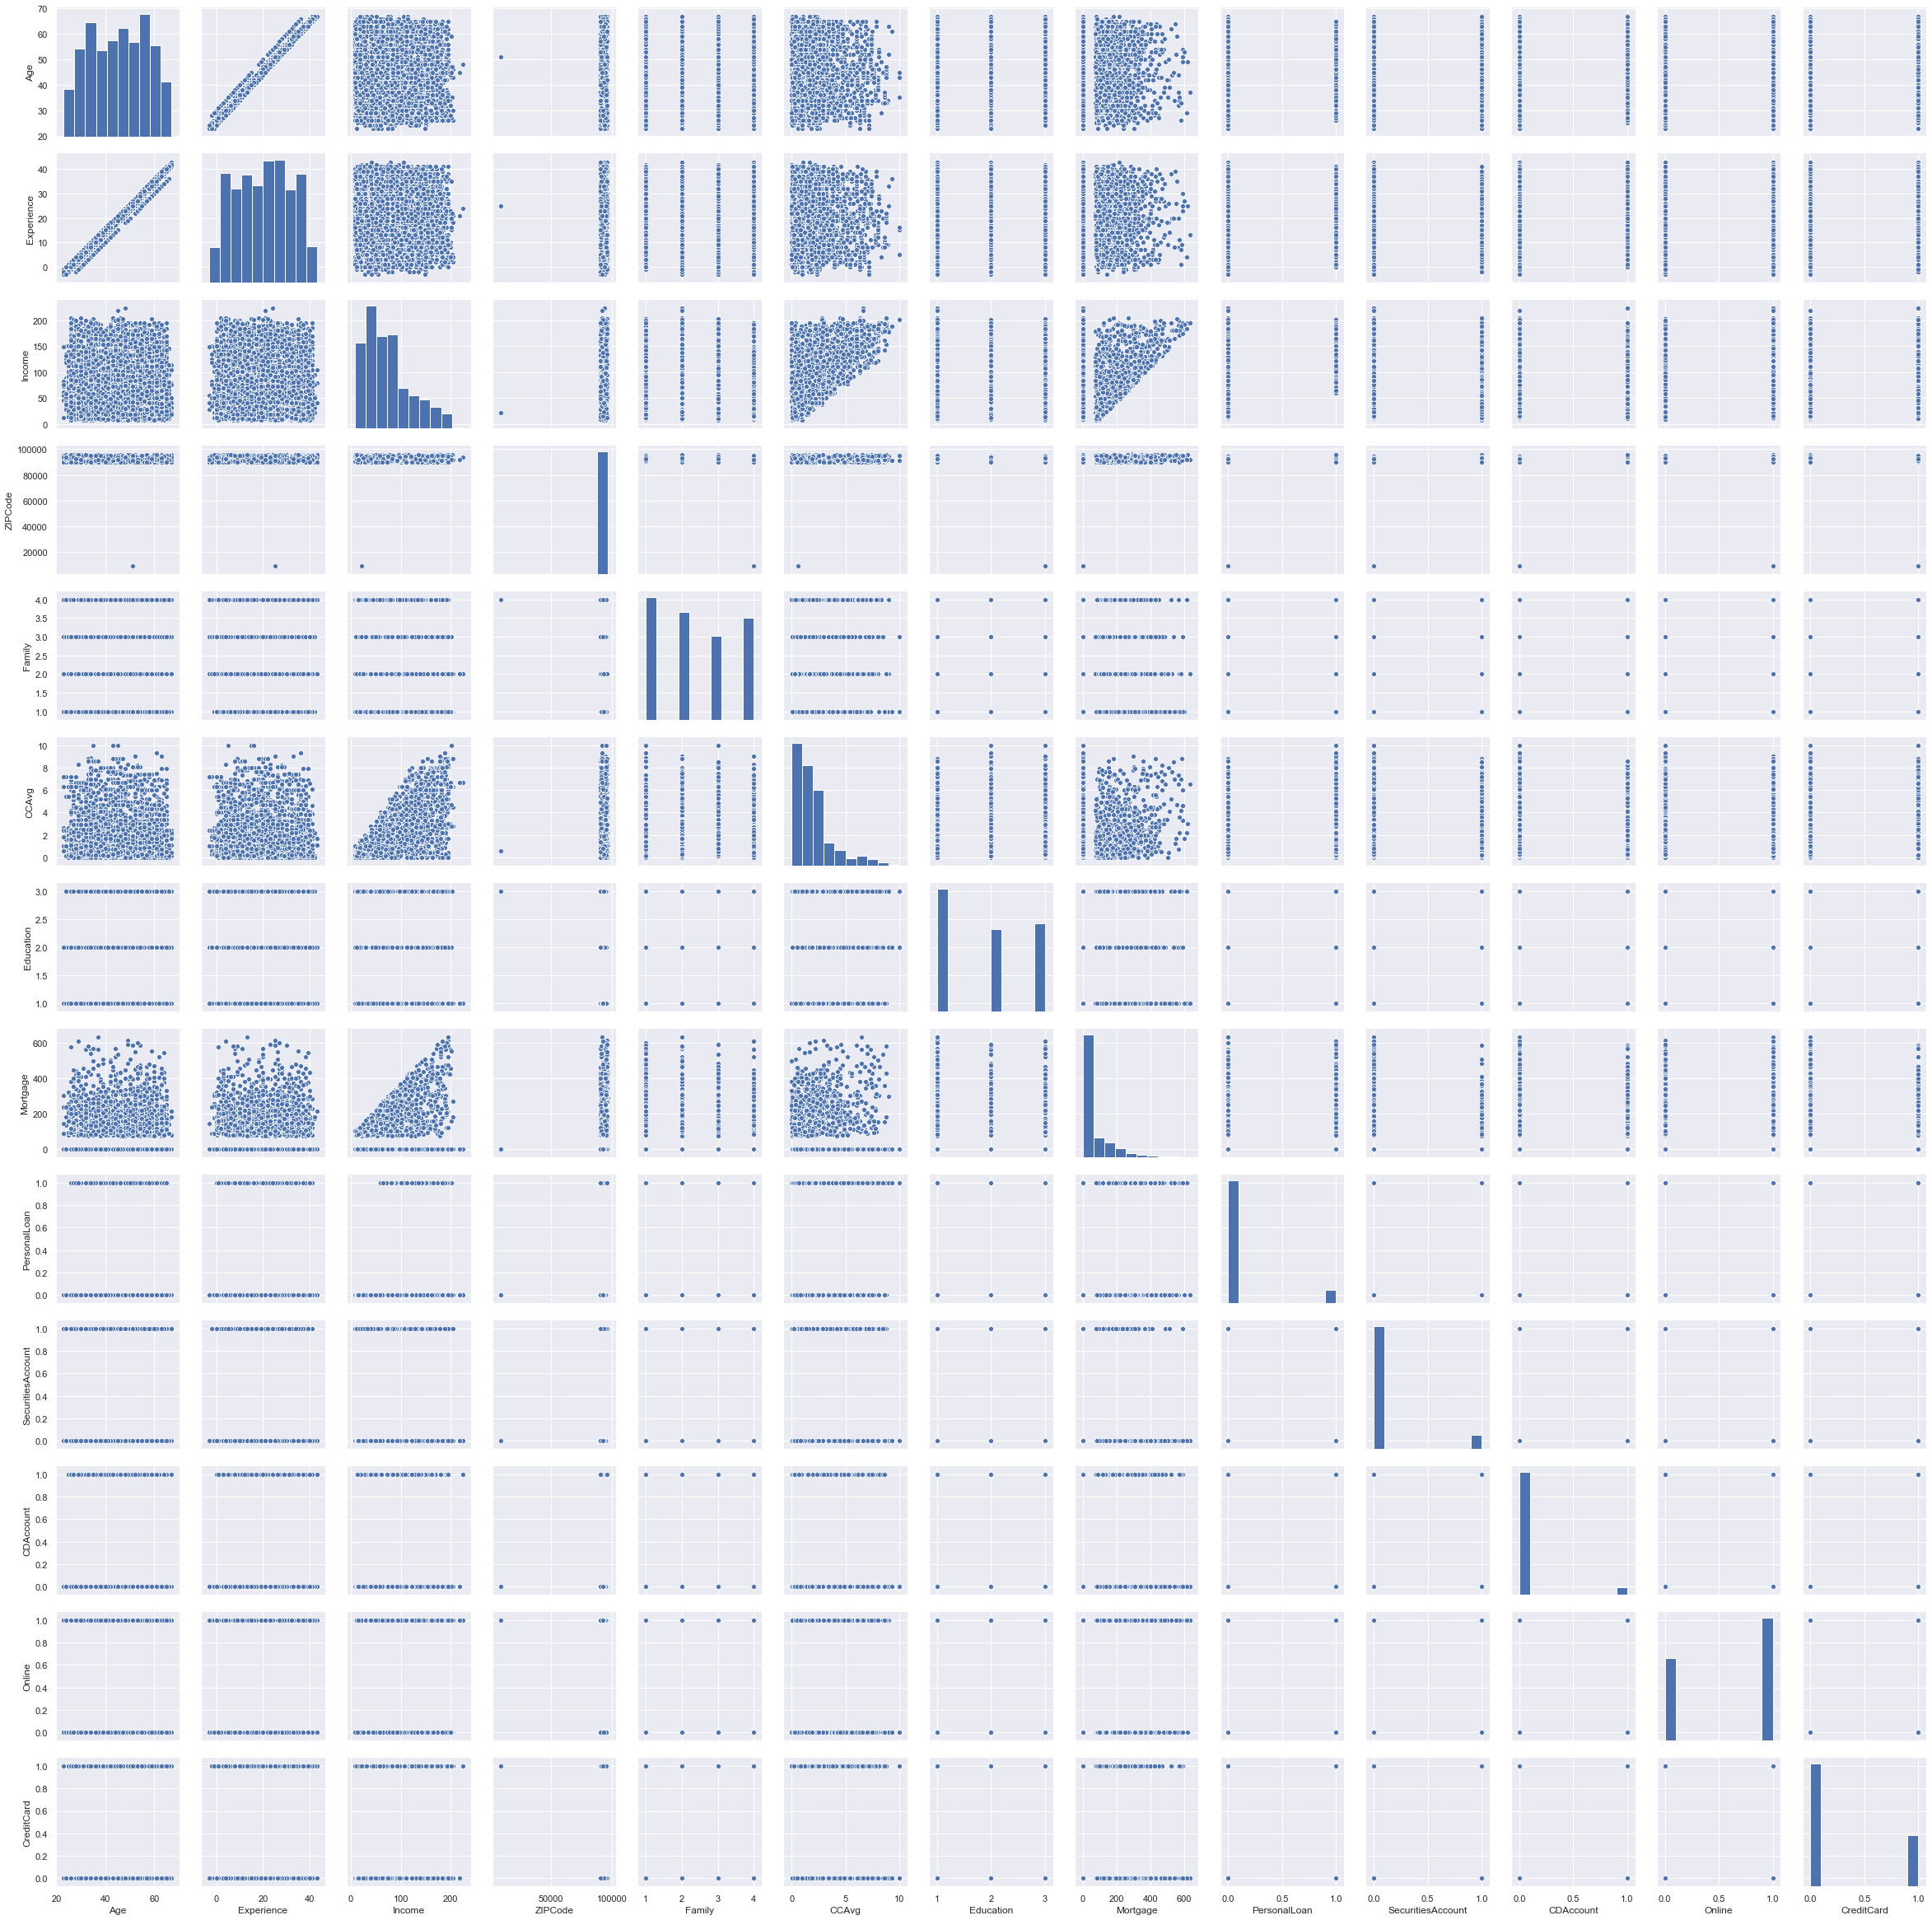

In [95]:
# Check the relation between each columns
sns.pairplot(data.iloc[:,1:])

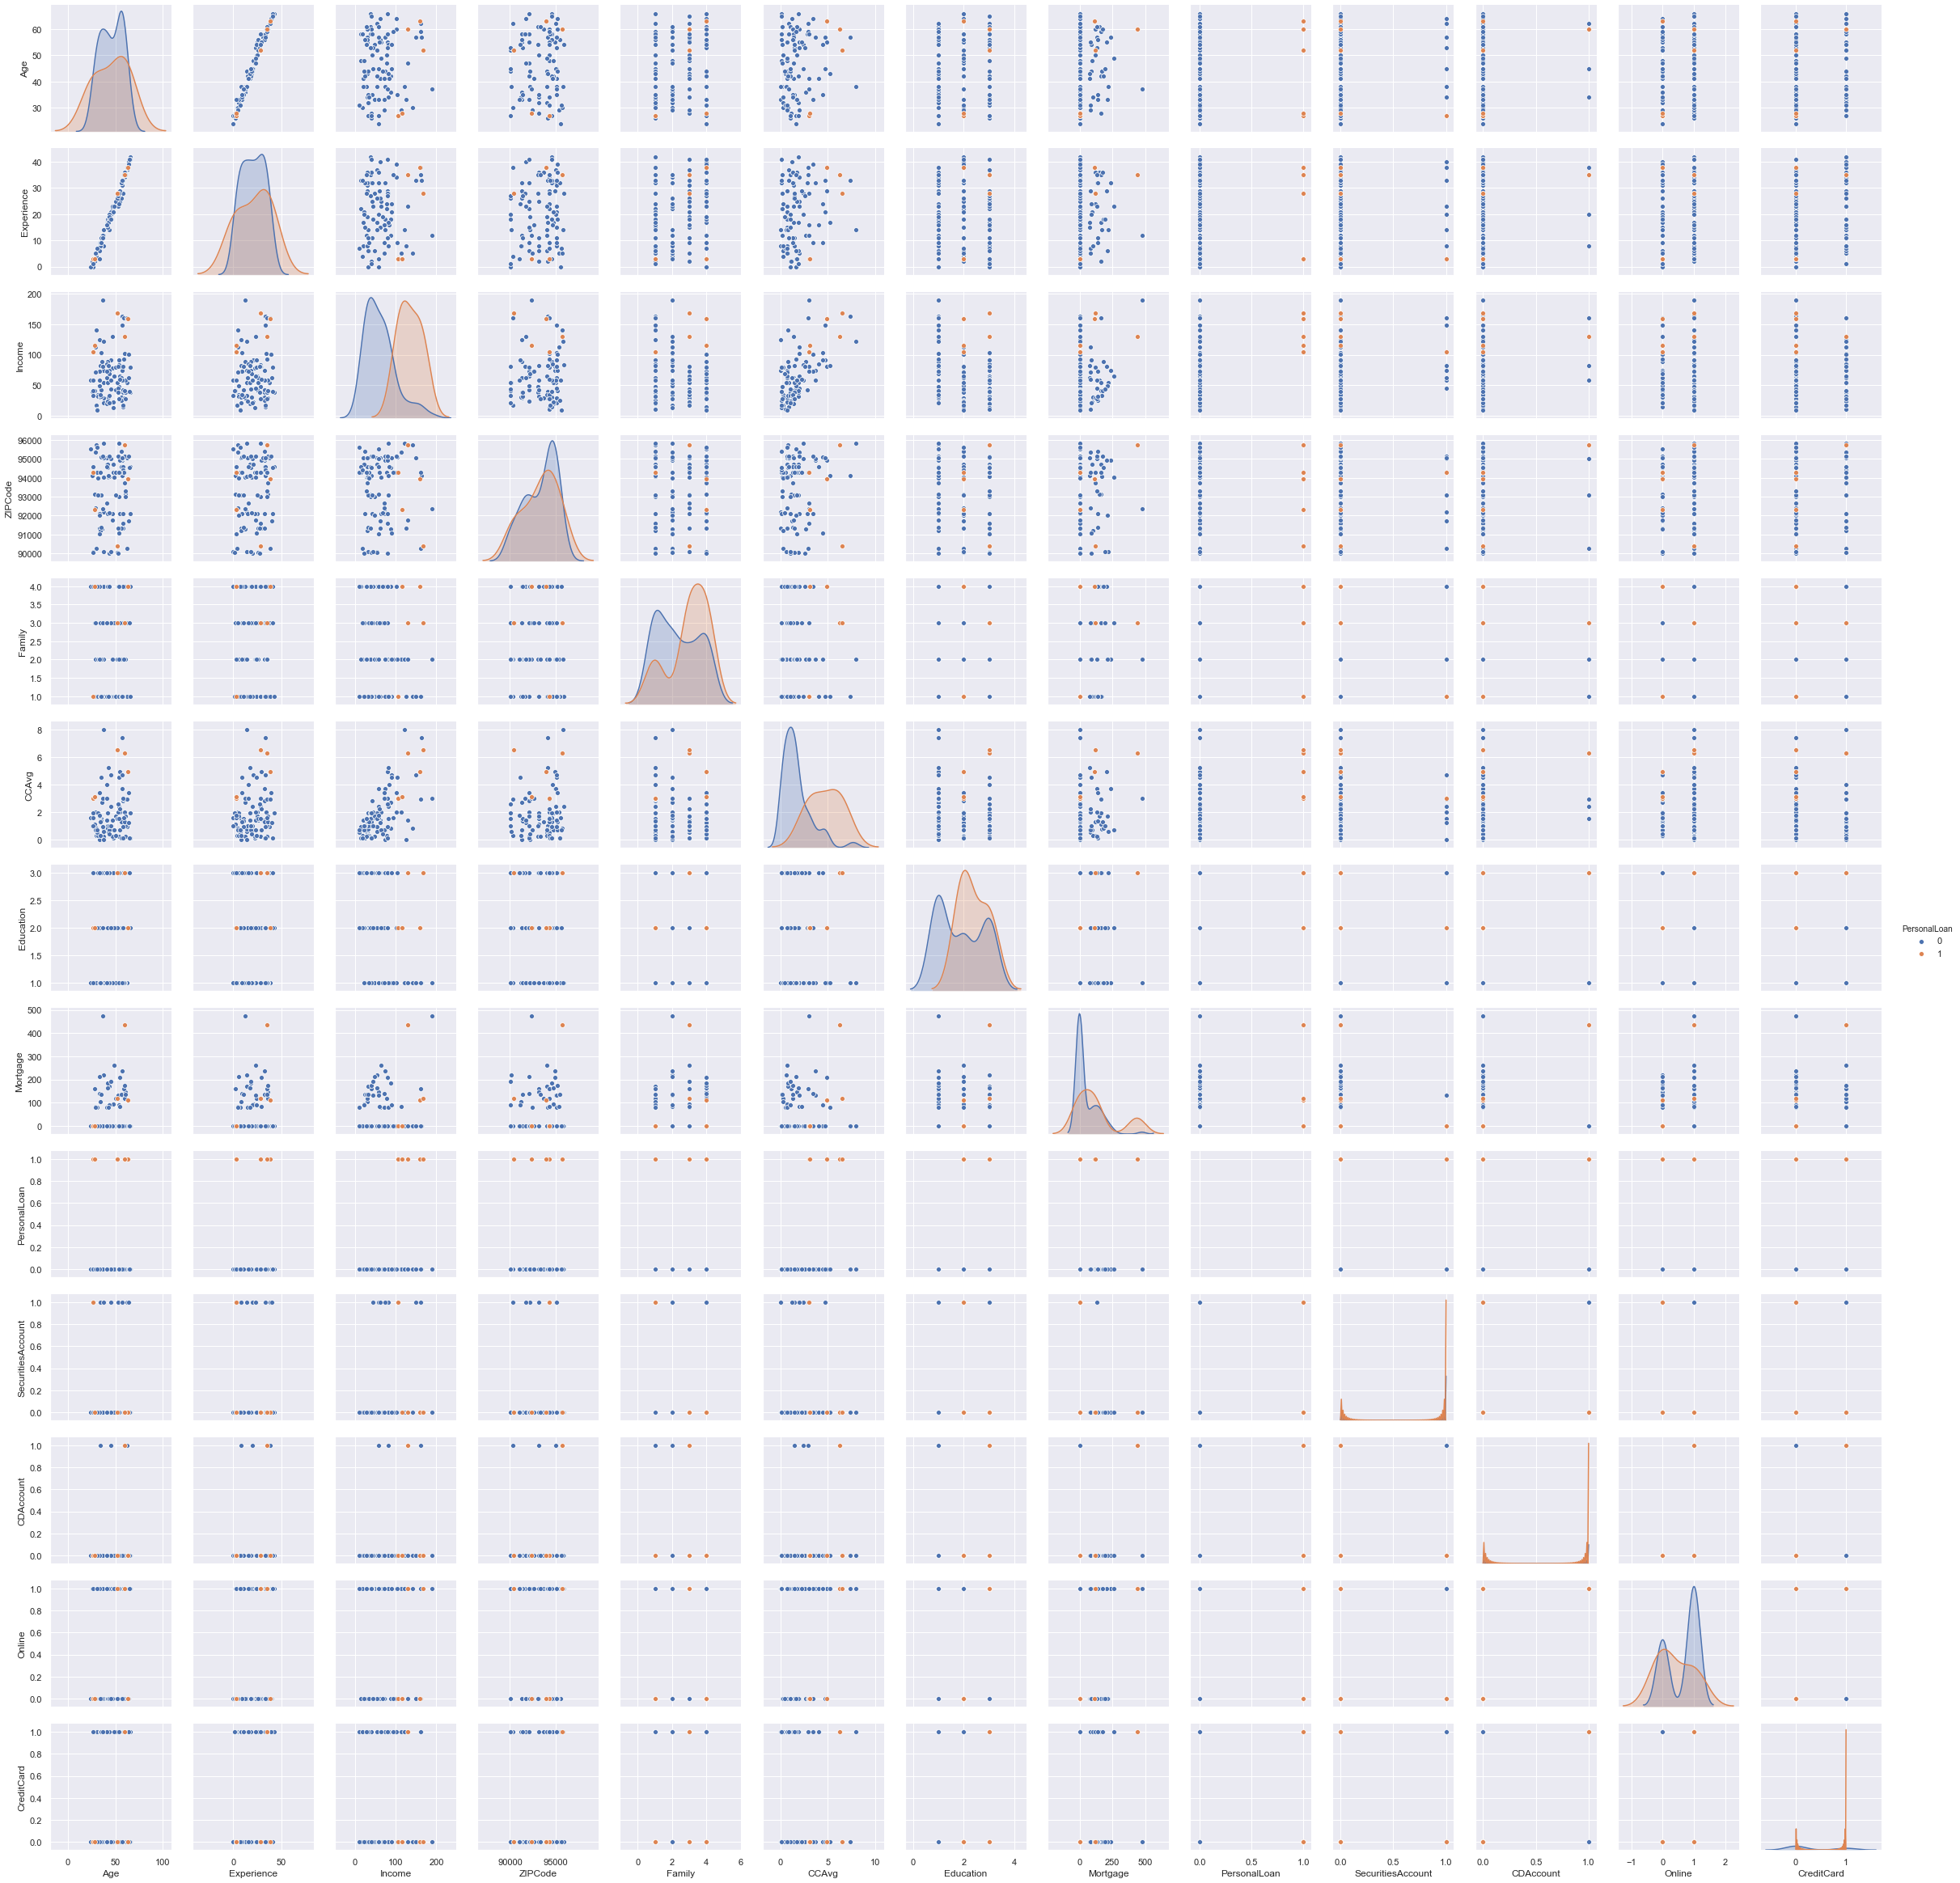

In [96]:
#sns.pairplot()
sns.pairplot(data.iloc[:,1:].sample(100),diag_kind='kde', hue="PersonalLoan")

In [97]:
#Observations:
# Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median
# Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.
# Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median
# CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
# Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K
# The variables family and education are ordinal variables. The distribution of families is evenly distributes

In [98]:
#Data Cleaning:

In [99]:
# Found some negative values on Experience column
data[data['Experience'] < 0]['Experience'].count()

52

In [100]:
#clean the negative variable
dfExp = data.loc[data['Experience'] >0]
negExp = data.Experience < 0
column_name = 'Experience'
mylist = data.loc[negExp]['ID'].tolist() # getting the customer ID who has negative experience

In [101]:
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [102]:
for id in mylist:
    age = data.loc[np.where(data['ID']==id)]["Age"].tolist()[0]
    education = data.loc[np.where(data['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = exp

In [103]:
data[data['Experience'] < 0]['Experience'].count()

0

In [104]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


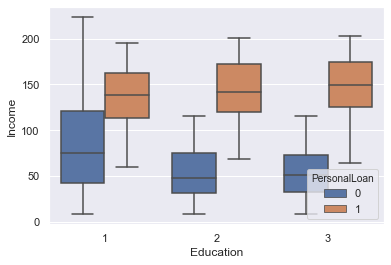

In [105]:
# Here the target column is PersonalLoan
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=data)

In [106]:
# Observation : It seems the customers whose education level is 1 is having more income. 
# However customers who have taken the personal loan have the same income levels

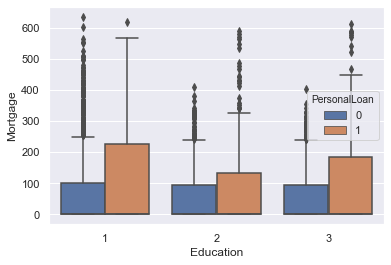

In [107]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=data)

In [108]:
# Inference : The customers who have personal loan have high mortgage

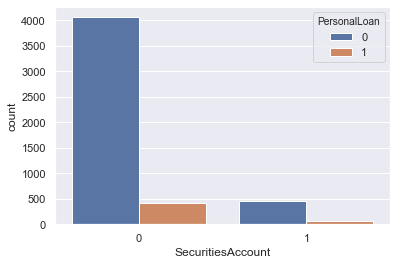

In [109]:
sns.countplot(x="SecuritiesAccount", data=data,hue="PersonalLoan")

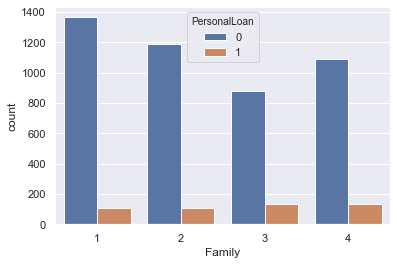

In [110]:
sns.countplot(x='Family',data=data,hue='PersonalLoan')

In [111]:
# Observations - Family size does not have any impact in personal loan

Text(0.5, 0, 'Experience')

Text(0, 0.5, 'Age')

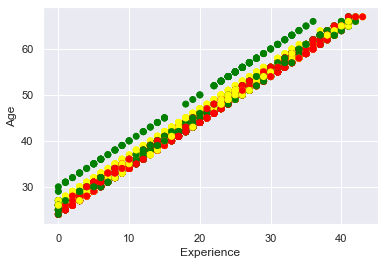

In [112]:
colors = {1:'red',2:'yellow',3:'green'}
plt.scatter(data['Experience'],data['Age'],c=data['Education'].apply(lambda x:colors[x]))
plt.xlabel('Experience')
plt.ylabel('Age')

In [113]:
# Above plot shows that experinece and age are having positive correlation.

<Figure size 720x576 with 0 Axes>

Text(0.5, 1, 'Correlation')

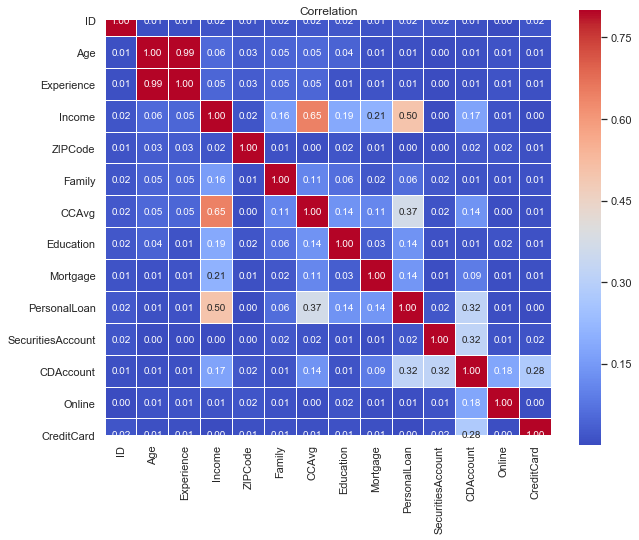

In [114]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr().abs(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01, cmap='coolwarm')
plt.title('Correlation')
plt.show()

In [115]:
# From the above correlation chart, we can observe that
# Correlation between Age and Experience is 0.99.
# Correlation between Income and CCAvg is 0.65.
# These are the pairs of features having high correlation i.e (>0.5)

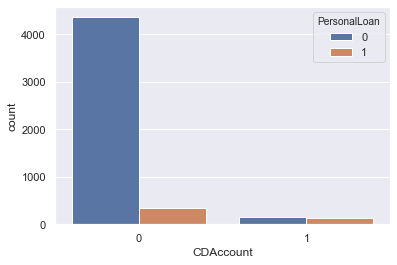

In [116]:
sns.countplot(x='CDAccount',data=data,hue='PersonalLoan')

In [117]:
# Observation: Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account have loan as well

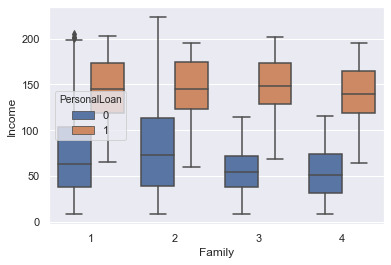

In [118]:
sns.boxplot(x=data.Family,y=data.Income,hue=data.PersonalLoan)

In [119]:
# Observation - Families with income less than 100K are less likely to take loan than families with high income

ValueError: cannot convert float NaN to integer

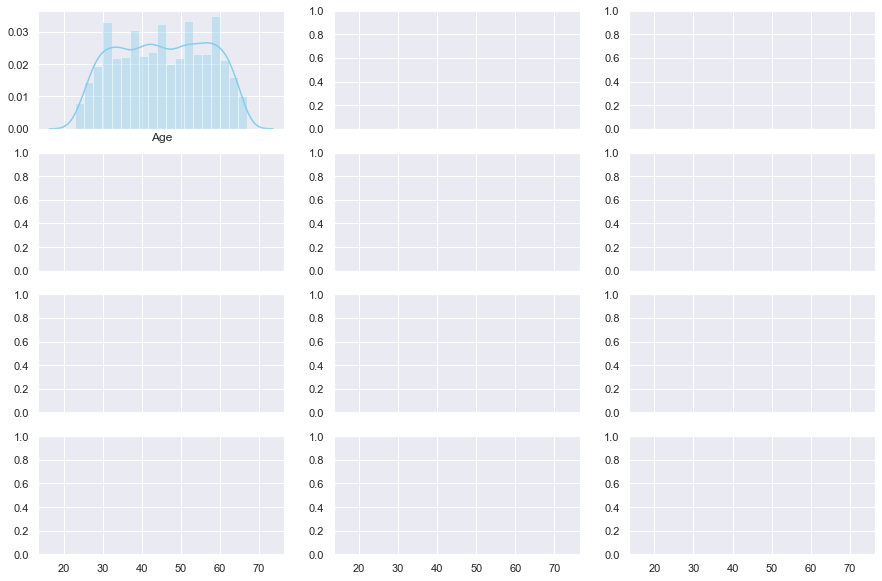

In [120]:
#Distribution of each feature
features = data.copy(deep=True)
f, axes = plt.subplots(4, 3, figsize=(15, 10), sharex=True)
sns.distplot(features["Age"], rug=False, color="skyblue", ax=axes[0, 0])
sns.distplot(features["Experience"], rug=False, color="olive", ax=axes[0, 1])
sns.distplot(features["Income"], rug=False, color="gold", ax=axes[0, 2])
sns.distplot(features["Family"], rug=False, color="teal", ax=axes[1, 0])
sns.distplot(features["CCAvg"], rug=False, ax=axes[1, 1])
sns.distplot(features["Education"], rug=False, color="red", ax=axes[1, 2])
sns.distplot(features["Mortgage"], rug=False, color="skyblue", ax=axes[2, 0])
sns.distplot(features["SecuritiesAccount"], rug=False, color="olive", ax=axes[2, 1])
sns.distplot(features["CDAccount"], rug=False, color="gold", ax=axes[2, 2])
sns.distplot(features["Online"], rug=False, color="teal", ax=axes[3, 0])
sns.distplot(features["CreditCard"], rug=False, ax=axes[3, 1])

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)

In [ ]:
train_labels = train_set.pop('PersonalLoan')
test_labels = test_set.pop('PersonalLoan')

In [ ]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
#train_set, test_set, train_labels, test_labels = train_test_split(X, Y, test_size=0.30, random_state=1)

# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model_gnb = GaussianNB()
model_gnb.fit(train_set, train_labels)

model_gnb.score(train_set , train_labels)      # performance on test data

test_pred = model_gnb.predict(test_set)

print(metrics.classification_report(test_labels, test_pred))

In [ ]:
# Naive Bayes
from sklearn.model_selection import cross_val_score, cross_val_predict

y_predict_gnb = model_gnb.predict(test_set)
gnb_acc=metrics.accuracy_score(test_labels,y_predict_gnb)
print("Naive Bayes Accuracy is: ", gnb_acc)
print(metrics.confusion_matrix(test_labels, test_pred))
scores = cross_val_score(model_gnb, train_set, train_labels, cv=10)
print("Cross-validated scores:", scores , scores)
print("Average score:" , np.average(scores))

In [ ]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(solver='lbfgs' , max_iter=5000 , multi_class='multinomial')
model_lr.fit(train_set, train_labels)

model_lr.score(train_set , train_labels)      # performance on test data
test_pred = model_lr.predict(test_set)

print(metrics.classification_report(test_labels, test_pred))

lr_acc=metrics.accuracy_score(test_labels,y_predict_gnb)
print("Logistic Regression Accuracy is: ", lr_acc)

print(metrics.confusion_matrix(test_labels, test_pred))

scores = cross_val_score(model_lr, train_set, train_labels, cv=10)
print("Cross-validated scores:", scores , scores)
print("Average score:" , np.average(scores))

In [ ]:
print("Logistic Regression score:" , model_lr.score(train_set , train_labels))
print("Nave Bayes score:" , model_gnb.score(train_set , train_labels))

In [ ]:
# Here Logistic Regression model seems like have the highest accuracy and we can choose that as our final model

In [ ]:
# Compare Models
X=data.drop(['PersonalLoan','Experience','ID'],axis=1)
y=data.pop('PersonalLoan')

In [ ]:
from sklearn import model_selection
import matplotlib.pyplot as plt

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# Here Logistic Regression model seems like have the highest accuracy and we can choose that as our final model

In [ ]:
# Putting feature variable to X
X = data.drop(['ID','ZIPCode','PersonalLoan'],axis=1)

# Putting response variable to y
y = data['PersonalLoan']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

In [ ]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

In [ ]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(10, 100, 10),
    'min_samples_split': range(10, 100, 10),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X,y)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.sort_values('mean_test_score', ascending=False)[0:5]

In [ ]:
# Fitting the decision tree with best hyperparameters

model = DecisionTreeClassifier(max_depth=10,criterion='gini',min_samples_leaf=10,min_samples_split=60)
model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = model.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_jobs=-1)
param={'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
GS=GridSearchCV(knn,param,cv=5,scoring='recall')
GS.fit(X,y)

In [ ]:
GS.best_params_

In [ ]:
#update and redifine your knn model
KNN=KNeighborsClassifier(n_neighbors=1, weights='uniform')

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
LR_bag=BaggingClassifier(base_estimator=LR,n_estimators=25,random_state=0,n_jobs=-1)
NB_bag=BaggingClassifier(base_estimator=NB,n_estimators=24,random_state=0,n_jobs=-1)
KNN_bag=BaggingClassifier(base_estimator=KNN,n_estimators=80,random_state=0,n_jobs=-1)
DT_reg=DecisionTreeClassifier(max_depth=10,criterion='gini',min_samples_leaf=10,min_samples_split=60)
DT_bag=BaggingClassifier(n_estimators=10,random_state=0,n_jobs=-1)
RF=RandomForestClassifier(n_estimators=130,criterion='entropy',random_state=0,n_jobs=-1)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
kf=KFold(n_splits=5,shuffle=True,random_state=0)
for model, name in zip([LR,LR_bag,NB,NB_bag,KNN,KNN_bag,DT_reg,DT_bag,RF], 
      ['LR','BaggedLR','NB','BaggedNB','KNN','BaggedKNN','DT_Reg','BaggedDT','RF']):
    roc_auc=[]
    for train,test in kf.split(X,y):
        Xtrain,Xtest=X[train,:],X[test,:]
        Ytrain,Ytest=y[train],y[test]
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        #cm=metrics.confusion_matrix(Ytest,Y_predict)
        fpr,tpr, _ = roc_curve(Ytest,Y_predict)
        roc_auc.append(auc(fpr, tpr))
    print("AUC scores: %0.02f (+/- %0.5f) [%s]" % (np.mean(roc_auc),
                                    np.var(roc_auc,ddof=1), name ))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
#Boosting models
LR_boost=AdaBoostClassifier(base_estimator=LR,n_estimators=170)
NB_boost=AdaBoostClassifier(base_estimator=NB,n_estimators=350)
RF_boost=AdaBoostClassifier(base_estimator=RF,n_estimators=100)
DT_boost=AdaBoostClassifier(n_estimators=100)
GB_boost=GradientBoostingClassifier(n_estimators=100)

In [ ]:
#Stacked Model
stacked = VotingClassifier(estimators = [('Bagged_LR',LR_bag),('BoostedRF', RF_boost), ('GBoost', GB_boost)],voting='soft')

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
from sklearn.model_selection import KFold
#from sklearn.metrics import roc_curve, auc
kf=KFold(n_splits=5,shuffle=True,random_state=0)
for model, name in zip([LR,LR_boost,NB,NB_boost,DT_boost,RF,RF_boost,GB_boost,stacked], 
      ['LR','BoostedLR','NB','BoostedNB','BoostedDT','RF','BoostedRF','GradientBoost','stacked']):
    roc_auc=[]
    for train,test in kf.split(X,y):
        Xtrain,Xtest=X[train,:],X[test,:]
        Ytrain,Ytest=y[train],y[test]
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        #cm=metrics.confusion_matrix(Ytest,Y_predict)
        fpr,tpr, _ = roc_curve(Ytest,Y_predict)
        roc_auc.append(auc(fpr, tpr))
    print("AUC scores: %0.02f (+/- %0.5f) [%s]" % (np.mean(roc_auc),
                                    np.var(roc_auc,ddof=1), name ))

In [ ]:
# Inference
# From the above model, we can clearly infer Gradient Boosting followed by Boosted Random forest performs better with respect to AUC as well as Variance

In [ ]:
# Overall understanding:

# Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age 
# Experience is normally distributed with more customer having experience starting from 8 years 
# Income is positively skewed. Majority of the customers have income between 45K and 55K 
# CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
# Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K
# The variables family and education are ordinal variables. The distribution of families is evenly distributed
# It seems the customers whose education level is 1 is having more income. 
# However customers who have taken the personal loan have the same income levels
# The customers who have personal loan have high mortgage
# Family size does not have any impact in personal loan
# Experinece and age are having positive correlation
# Correlation between Age and Experience is 0.99
# Correlation between Income and CCAvg is 0.65
# Customers who do not have CD account, do not have loan as well and almost all customers who have CD account have loan as well
# Families with income less than 100K are less likely to take loan than families with high income
# Logistic Regression has higher accuracy than other models
# The LR Model can be boosted using Gradient Boosting and Boosted Random Forest 

In [ ]:
# Campaign Model for Personal Loan: 

# Target customers aged between 30-60 years with 8+ years of experience having income between 45k-55k preferably having a credit card and existing mortgage. 